<h1>**Exercise One : Linear Regression**</h1>

<h3> Introduction </h3>

In this exercise we will implement linear regression and see it work on data

Files included with this exercise:

 - ex1data1.txt - Dataset for linear regression with one variable
 - ex1data2.txt - Dataset for linear regression with multiple variables
 



In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.patches as mpatches 
import matplotlib.lines as mlines # for creating a legend

# tells matplotlib to embed plots within the notebook
%matplotlib inline

<h3> 1 Simple Python function </h3>

We will warmup by creating a function which returns an n x n identity matrix

In [6]:
def warmupexercise(x):
    A = np.identity(x)
    return A

Now we can run the function with an input of 5 to create a 5 x 5 identity matrix

In [7]:
warmupexercise(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

<h3>2 Linear Regression with One Variable </h3>

In this part of this exercise, we will implement linear regression with one variable to predict proﬁts for a food truck. Suppose you are the CEO of a restaurant franchise and are considering diﬀerent cities for opening a new outlet. The chain already has trucks in various cities and we have data for proﬁts and populations from the cities.

We would like to use this data to help you select which city to expand to next. The ﬁle ex1data1.txt contains the dataset for our linear regression problem. The ﬁrst column is the population of a city and the second column is the proﬁt of a food truck in that city. A negative value for proﬁt indicates a loss. 

We now load the data

In [8]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples

<h4>2.1 Plotting the Data</h4>

Before starting on the task it is useful to visualize the data. Since we are dealing with only two variables, we can do this with a scatterplot.

In [9]:
def plotData(X,y):
    red_x = pyplot.plot(X, y, 'ro', ms=10, mec='k')
    pyplot.title('Figure 1: Scatter Plot of Training Data')
    pyplot.xlabel('Population of City in 10,000s')
    pyplot.ylabel('Profit in $10,000s')

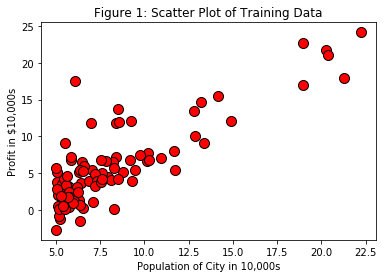

In [10]:
plotData(X,y)

<h4> 2.2 Gradient Descent</h4>

Here we will fit theta to our data using Gradient Descent.

In [11]:
m = y.size # number of samples
X = np.stack([np.ones(m), X], axis=1) # add collumn of ones to data for theta0 intercept term
 
# NOTE: If ValueError: all input arrays must have the same shape appears then you may have run this cel multiple times
#    which will have added multiple collumns of ones to the matrix X


In [12]:
# Here we set the number of iterations as well as learning rate alpha
iterations = 1500
alpha = 0.01

Now that we are properly setup we can begin implementing Gradient Descent. We do this by subtracting from theta our scaled derivative of the cost function. We will also keep track of the cost function to check accuracy. Relevant formulas are as follows:

$$J(\Theta ) = 1/(2m)\sum_{i = 1}^{m} (h_\theta (x^i) - y^i)$$

$$h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

$$\theta_j = \theta_j - (\alpha/m)\sum_{i = 1}^{m}(h_\theta(x^i) - y^i)x_j^i$$

We begin by creating a function which can return the cost J given training set X and y and an intitial theta


In [28]:
def computeCost(X,y,theta):
    # initialize some useful values
    m = y.size  # number of training examples
    J = 0 # initialize zero cost
    
    # Vectorized implementation of cost function J(theta)
    H = X.dot(theta)
    J = np.subtract(H,y)
    J = np.square(J)
    J = np.sum(J)
    J = J*(1/(2*m))
    # ===========================================================
    return J

Now we can run the function with a few different theta initializations 

In [29]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)

ValueError: shapes (47,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

Now that we have a working cost function, we can implement Gradient Descent

In [30]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # Initialize useful values
    m = y.size
    n = theta.size
    J_history = []
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    for i in range(num_iters):
        hypothesis = X.dot(theta)
        errors = np.subtract(hypothesis,y)
        Xtrans = X.transpose()
        gradient = alpha*(1/m)*Xtrans.dot(errors)
        theta = theta - gradient
        J_history.append(computeCost(X,y,theta))
    return(theta, J_history)
    

In [31]:
# Test Case

# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

ValueError: shapes (47,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

Now we have a theta we can fit our data to a line

ValueError: shapes (47,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

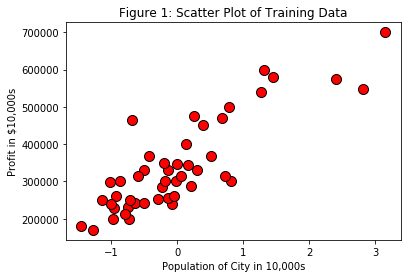

In [32]:
plotData(X[:,1], y)
pyplot.plot(X[:,1],np.dot(X,theta),'-')
pyplot.legend(['Training Data', 'Linear Regression'])
pass

In [33]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 0.00

For population = 70,000, we predict a profit of 0.00



<h4>2.4 Visualizing J(theta)</h4>

To better understand our cost function, we will now plot the cost over a 2-d grid of theta0 and theta1 values.

In [34]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass

ValueError: shapes (47,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

<h3>3 Linear Regression with Multiple Variables</h3>

Here we implement linear regression with multiple variable to predict the price of houses

<h4>3.1 Feature Normalization</h4>

We begin by creating a function to normalize our features by setting the mean to zero and standard deviation to 1

In [35]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


In [36]:
def featureNormalize(X):
    # Normalize features in x returning normalized version of X where 
    # mean value of each feature is zero and the standard deviation is 1
    
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    m = X.shape[0]
    n = X.shape[1]

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    tempMu = np.zeros(X.shape)
    for i in range(m):
        tempMu[i,:] = mu
    X_norm = np.subtract(X_norm,tempMu)
    for i in range(n):
        X_norm[:,i] = np.divide(X_norm[:,i],sigma[i])
    
    
    # ================================================================
    return X_norm, mu, sigma

In [37]:
X_norm, mu, sigma =featureNormalize(X);
print("Computed mean is ", mu)
print("Computed sigma is ", sigma)

Computed mean is  [2000.68085106    3.17021277]
Computed sigma is  [7.86202619e+02 7.52842809e-01]


In [38]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

<h4>3.2 Gradient Descent</h4>
We can now apply gradient descent to our normalized, multivariate data set and plot the cost relative to the number of iterations

theta computed from gradient descent: [334302.06399328  99411.44947359   3267.01285407]


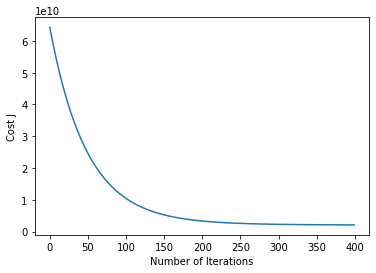

In [24]:
# Initialize (Adjusting these values can change how the effectiveness
#               of our minimization as seen on our graph)
alpha = 0.01
num_iters = 400

# initialize theta and run Gradient Descent
theta = np.zeros(3)
theta, J_history = gradientDescent(X,y,theta,alpha,num_iters)

# Graph it
pyplot.plot(np.arange(len(J_history)), J_history)
pyplot.xlabel("Number of Iterations")
pyplot.ylabel("Cost J")

# Resulting theta
print('theta computed from gradient descent: {:s}'.format(str(theta)))


<h4>3.3 Normal Equations </h4>

We can also use the closed form solution to linear regression which is 
$$\theta = (X^TX)^- X^Ty $$

In [156]:
def normalEqn(X,y):
   
    theta = np.linalg.pinv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    
    return theta
    

In [157]:
print("Predicted theta is ", normalEqn(X,y))

Predicted theta is  [340412.65957447 109447.79646964  -6578.35485416]
